Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Getting data

In [4]:
# Feature extracted vector of butterfly images
df = pd.read_csv("datasets/final_dataset.csv")

# showing top fifth
df.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,target
0,29.275214,-0.147201,-1.335186,5.263774,2.933685,-14.615108,7.565177,-8.898978,-16.116767,7.206693,...,3.754211,1.955780,-2.846820,-2.594667,-1.665765,11.178280,-7.645203,4.779743,0.896216,1
1,43.960923,-25.890576,22.524388,-3.134579,32.609728,-19.598023,17.939081,18.361859,-21.754190,-17.046747,...,-0.120588,-3.840173,8.638707,3.882905,-5.455157,-0.468976,-11.277624,-0.663129,-0.497319,1
2,5.218205,3.084408,-27.803279,-2.221283,-5.707876,-8.569674,0.951585,5.912482,5.848390,10.257646,...,-10.112489,-3.959618,13.063066,54.582594,-12.624812,1.808988,-4.303192,17.549340,8.711923,1
3,-20.494164,-18.120083,-15.401201,2.056117,18.834858,16.911382,0.487602,10.095791,8.490112,0.917253,...,-9.844180,3.275873,-4.053599,-6.252846,-7.054679,10.603682,-0.834759,4.843701,-1.522923,1
4,3.769366,-26.453038,-16.908507,12.519255,2.701589,-1.982461,21.484898,15.607886,14.941911,-12.432393,...,6.485967,-3.365990,6.606531,-3.953705,5.060607,23.305445,-2.619473,-7.971622,-25.330169,1


Splitting dataframe

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop(columns = 'target').copy().to_numpy()
y = df.target.copy().to_numpy()

sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.15, random_state = 10)

for trainval_index, test_index in sss.split(X, y):
    X_trainval, X_test = X[trainval_index], X[test_index]
    y_trainval, y_test = y[trainval_index], y[test_index]
    
for train_index, val_index in sss.split(X_trainval, y_trainval):
    X_train, X_val = X_trainval[train_index], X_trainval[val_index]
    y_train, y_val = y_trainval[train_index], y_trainval[val_index]

In [70]:
from sklearn_custom.linear_model import LogisticRegression
from sklearn_custom.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn_custom.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
lr = OneVsRestClassifier(LogisticRegression())
sv = OneVsOneClassifier(SVC(kernel = 'poly', probability = True))
kn = KNeighborsClassifier(n_neighbors = 5)
dt = DecisionTreeClassifier()

lr_pipe = Pipeline([('scaler', StandardScaler()), ('clf', lr)])
sv_pipe = Pipeline([('scaler', StandardScaler()), ('clf', sv)])
kn_pipe = Pipeline([('scaler', StandardScaler()), ('clf', kn)])
dt_pipe = Pipeline([('scaler', StandardScaler()), ('clf', dt)])

lr_pipe.fit(X_train, y_train)
sv_pipe.fit(X_train, y_train)
kn_pipe.fit(X_train, y_train)
dt_pipe.fit(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -2.3053e-05 -1.2629e+02  5e+02  1e+00  2e-15
 1:  6.0757e-03 -3.3078e+01  4e+01  2e-02  4e-15
 2:  5.6923e-03 -5.4809e-01  6e-01  3e-04  2e-15
 3: -1.3398e-03 -1.7945e-02  2e-02  5e-06  6e-16
 4: -2.8899e-03 -3.8397e-03  1e-03  5e-08  6e-16
 5: -2.9959e-03 -3.0581e-03  6e-05  1e-09  5e-16
 6: -3.0008e-03 -3.0067e-03  6e-06  8e-11  3e-16
 7: -3.0013e-03 -3.0016e-03  3e-07  3e-12  3e-16
 8: -3.0013e-03 -3.0013e-03  8e-09  7e-14  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5196e-06 -1.0307e+02  4e+02  1e+00  1e-15
 1:  2.0952e-03 -2.6816e+01  3e+01  2e-02  1e-15
 2:  2.5111e-03 -3.5741e-01  4e-01  2e-04  2e-15
 3: -4.5604e-05 -7.2559e-03  7e-03  2e-06  6e-16
 4: -9.5007e-04 -1.4426e-03  5e-04  2e-08  6e-16
 5: -1.0198e-03 -1.0815e-03  6e-05  1e-09  3e-16
 6: -1.0269e-03 -1.0309e-03  4e-06  3e-11  4e-16
 7: -1.0275e-03 -1.0280e-03  5e-07  3e-12  3e-16
 8: -1.0276e-03 -1.0276e-03  2e-08  5e-14  3e-1

 7: -1.0317e-03 -1.0319e-03  2e-07  4e-15  3e-16
 8: -1.0318e-03 -1.0318e-03  9e-09  2e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3621e-06 -8.4021e+01  3e+02  1e+00  1e-15
 1:  2.1499e-03 -2.1812e+01  2e+01  1e-02  6e-16
 2:  2.5699e-03 -2.3437e-01  3e-01  1e-04  7e-16
 3: -2.1097e-04 -5.8004e-03  6e-03  1e-06  7e-16
 4: -9.9540e-04 -1.4024e-03  4e-04  1e-08  6e-16
 5: -1.0534e-03 -1.1041e-03  5e-05  4e-10  3e-16
 6: -1.0586e-03 -1.0616e-03  3e-06  7e-12  3e-16
 7: -1.0589e-03 -1.0591e-03  2e-07  3e-13  2e-16
 8: -1.0589e-03 -1.0590e-03  3e-08  2e-14  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6607e-06 -1.0901e+02  4e+02  1e+00  9e-16
 1:  2.2607e-03 -2.8291e+01  3e+01  1e-02  7e-16
 2:  2.7502e-03 -3.1272e-01  3e-01  2e-04  7e-16
 3: -1.8334e-04 -6.8430e-03  7e-03  2e-06  6e-16
 4: -1.0362e-03 -1.4964e-03  5e-04  1e-08  6e-16
 5: -1.0947e-03 -1.1860e-03  9e-05  2e-09  3e-16
 6: -1.1076e-03 -1.1194

 2: -2.7717e-03 -5.4866e-01  6e-01  2e-04  6e-16
 3: -2.1395e-02 -4.4337e-02  2e-02  4e-06  6e-16
 4: -2.3239e-02 -2.4305e-02  1e-03  3e-08  6e-16
 5: -2.3332e-02 -2.3378e-02  5e-05  4e-10  4e-16
 6: -2.3336e-02 -2.3338e-02  1e-06  5e-12  4e-16
 7: -2.3336e-02 -2.3336e-02  4e-08  6e-14  4e-16
Optimal solution found.


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier())])

In [71]:
y_train_pred = sv_pipe.predict(X_train)
y_val_pred = sv_pipe.predict(X_val)

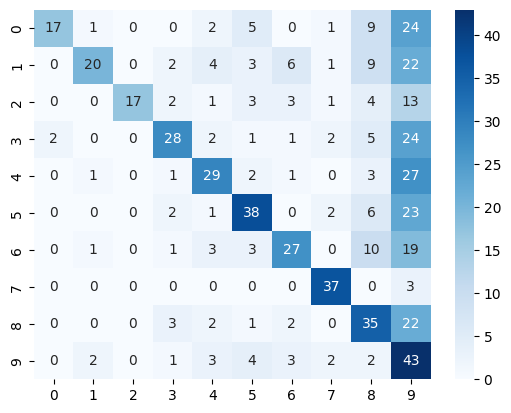

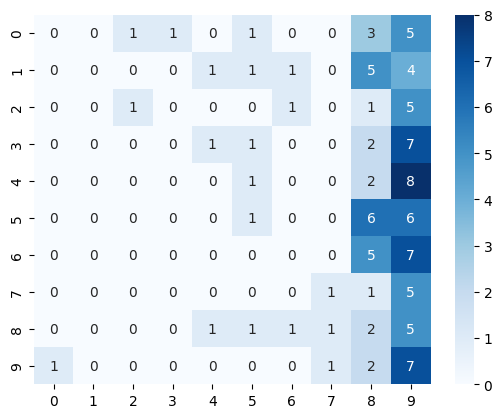

In [72]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, cmap = 'Blues')
plt.show()
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot = True, cmap = 'Blues')
plt.show()

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_val, y_val_pred, average =)

array([0.        , 0.        , 0.        , 0.06666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07692308])

In [53]:
from sklearn_custom.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
y_train_pred = dt.predict(X_train)
y_val_pred = dt.predict(X_val)

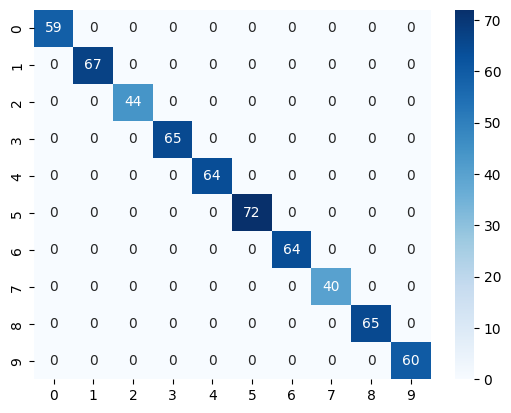

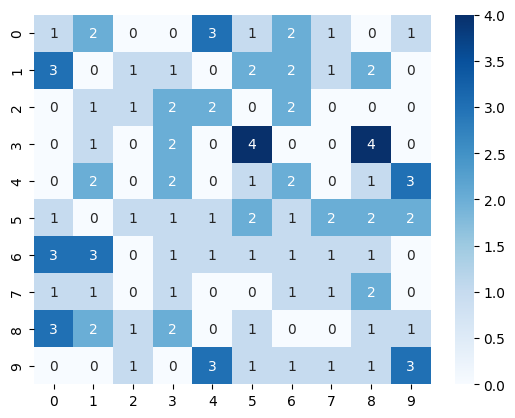

In [57]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, cmap = 'Blues')
plt.show()
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot = True, cmap = 'Blues')
plt.show()